Commandes pour installer les packages nécessaires dans l'environnement virtuel:

In [1]:
#import sys
#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install scikit-image
#!{sys.executable} -m pip install scikit-learn
#!{sys.executable} -m pip install pillow
#!{sys.executable} -m pip install SimpleITK
#!{sys.executable} -m pip install opencv-python
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install qtconsole
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install pydot
#!{sys.executable} -m pip install graphviz
#!pip install PyDrive

! pip install kaggle
! pip install nvidia-smi
! gdown --id 11dzPv9LxegCDJTNE0RVCJD9hi2sxjQb4
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d 'moulhanout/stanford-dogs-dataset'
! unzip stanford-dogs-dataset

#! kaggle datasets list -s 'Stanford Dogs'
#! pip install --upgrade --force-reinstall --no-deps kaggle

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: images/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1357.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1367.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13738.jpg  
  inflating: images/

Import des librairies

In [24]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from keras import layers, Input
from keras.layers import Dense, InputLayer, Flatten
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import scipy.io
from PIL import Image, ImageOps
import time
from keras.preprocessing.image import img_to_array, load_img
from bs4 import BeautifulSoup

Navigation vers le dossiers contenant les images et les libellés:

In [3]:
cd ../Formation_Ingenieur_Machine_Learning/P6_voelker_jean-florent

[Errno 2] No such file or directory: '../Formation_Ingenieur_Machine_Learning/P6_voelker_jean-florent'
/content


Je paramètre mes variables globales:

In [4]:
NB_CLASSES = 120
IMAGE_WIDTH = 200
IMAGE_HEIGHT = 200
NB_EPOCH = 100

DIRECTORY_TRAINED_MODEL = 'model.hdf5'
COLOR_MODE = "rgb"

ANNOTATION_PATH = os.path.join("annotation/Annotation")
IMAGE_FOLDER_PATH = os.path.join("images/Images")
CROPED_IMAGE_FOLDER_PATH = os.path.join("images/croped_Images")
GRAYSCALE_IMAGE_FOLDER_PATH = os.path.join("images/grayscale_Images")

Je charge les fichiers .mat :

In [5]:
file_list = scipy.io.loadmat('lists/file_list.mat')
train_list = scipy.io.loadmat('lists/train_list.mat')
test_list = scipy.io.loadmat('lists/test_list.mat')

J'ai 20580 images dans le dataset

In [6]:
print(len(file_list['file_list']))

20580


Je créé un DataFrame avec tous les noms d'image et toutes les classes d'image comme variables:

In [7]:
FileList_df=pd.DataFrame()
FileList_df[['NomImage']]=file_list['file_list']
FileList_df[['ClasseImage']]=file_list['labels']
FileList_df[['AnnotationList']]=file_list['annotation_list']
FileList_df

,NomImage,ClasseImage,AnnotationList
0,[n02085620-Chihuahua/n02085620_10074.jpg],1,[n02085620-Chihuahua/n02085620_10074]
1,[n02085620-Chihuahua/n02085620_10131.jpg],1,[n02085620-Chihuahua/n02085620_10131]
2,[n02085620-Chihuahua/n02085620_10621.jpg],1,[n02085620-Chihuahua/n02085620_10621]
3,[n02085620-Chihuahua/n02085620_1073.jpg],1,[n02085620-Chihuahua/n02085620_1073]
4,[n02085620-Chihuahua/n02085620_10976.jpg],1,[n02085620-Chihuahua/n02085620_10976]
...,...,...,...
20575,[n02116738-African_hunting_dog/n02116738_9798....,120,[n02116738-African_hunting_dog/n02116738_9798]
20576,[n02116738-African_hunting_dog/n02116738_9818....,120,[n02116738-African_hunting_dog/n02116738_9818]
20577,[n02116738-African_hunting_dog/n02116738_9829....,120,[n02116738-African_hunting_dog/n02116738_9829]
20578,[n02116738-African_hunting_dog/n02116738_9844....,120,[n02116738-African_hunting_dog/n02116738_9844]


In [8]:
TrainList_df=pd.DataFrame()
TrainList_df[['NomImage']]=train_list['file_list']
TrainList_df[['ClasseImage']]=train_list['labels']
TrainList_df

,NomImage,ClasseImage
0,[n02085620-Chihuahua/n02085620_5927.jpg],1
1,[n02085620-Chihuahua/n02085620_4441.jpg],1
2,[n02085620-Chihuahua/n02085620_1502.jpg],1
3,[n02085620-Chihuahua/n02085620_1916.jpg],1
4,[n02085620-Chihuahua/n02085620_13151.jpg],1
...,...,...
11995,[n02116738-African_hunting_dog/n02116738_10614...,120
11996,[n02116738-African_hunting_dog/n02116738_9282....,120
11997,[n02116738-African_hunting_dog/n02116738_6754....,120
11998,[n02116738-African_hunting_dog/n02116738_9333....,120


In [9]:
TestList_df=pd.DataFrame()
TestList_df[['NomImage']]=test_list['file_list']
TestList_df[['ClasseImage']]=test_list['labels']
TestList_df

,NomImage,ClasseImage
0,[n02085620-Chihuahua/n02085620_2650.jpg],1
1,[n02085620-Chihuahua/n02085620_4919.jpg],1
2,[n02085620-Chihuahua/n02085620_1765.jpg],1
3,[n02085620-Chihuahua/n02085620_3006.jpg],1
4,[n02085620-Chihuahua/n02085620_1492.jpg],1
...,...,...
8575,[n02116738-African_hunting_dog/n02116738_4991....,120
8576,[n02116738-African_hunting_dog/n02116738_3024....,120
8577,[n02116738-African_hunting_dog/n02116738_3635....,120
8578,[n02116738-African_hunting_dog/n02116738_2988....,120


Je modifie les colonnes "NomImage" de sorte à avoir accès directement à la valeur et non à un tableau à une valeur.

In [10]:
def getItemValue(x):
    return x[0]


FileList_df[['NomImage']]=FileList_df[['NomImage']].applymap(getItemValue)
FileList_df[['AnnotationList']]=FileList_df[['AnnotationList']].applymap(getItemValue)
print(FileList_df.head())

                                  NomImage  ...                       AnnotationList
0  n02085620-Chihuahua/n02085620_10074.jpg  ...  n02085620-Chihuahua/n02085620_10074
1  n02085620-Chihuahua/n02085620_10131.jpg  ...  n02085620-Chihuahua/n02085620_10131
2  n02085620-Chihuahua/n02085620_10621.jpg  ...  n02085620-Chihuahua/n02085620_10621
3   n02085620-Chihuahua/n02085620_1073.jpg  ...   n02085620-Chihuahua/n02085620_1073
4  n02085620-Chihuahua/n02085620_10976.jpg  ...  n02085620-Chihuahua/n02085620_10976

[5 rows x 3 columns]


In [11]:
TrainList_df[['NomImage']]=TrainList_df[['NomImage']].applymap(getItemValue)
print(TrainList_df.head())

                                  NomImage  ClasseImage
0   n02085620-Chihuahua/n02085620_5927.jpg            1
1   n02085620-Chihuahua/n02085620_4441.jpg            1
2   n02085620-Chihuahua/n02085620_1502.jpg            1
3   n02085620-Chihuahua/n02085620_1916.jpg            1
4  n02085620-Chihuahua/n02085620_13151.jpg            1


In [12]:
TestList_df[['NomImage']]=TestList_df[['NomImage']].applymap(getItemValue)
print(TestList_df.head())

                                 NomImage  ClasseImage
0  n02085620-Chihuahua/n02085620_2650.jpg            1
1  n02085620-Chihuahua/n02085620_4919.jpg            1
2  n02085620-Chihuahua/n02085620_1765.jpg            1
3  n02085620-Chihuahua/n02085620_3006.jpg            1
4  n02085620-Chihuahua/n02085620_1492.jpg            1


Je créé une fonction pour récupérer la le libellé de la race de chien

In [13]:
def getClassLibelle(x):
    classe_1 = x.split("/")
    classe_1 = classe_1[0]
    classe_2 = classe_1.split("-")
    return classe_2[1]

Je créé une colonne avec le libellé de la classe pour le dataframe TrainList_df 

In [14]:
TrainList_df[['ClasseImageLibelle']]=TrainList_df[['NomImage']].applymap(getClassLibelle)
TrainList_df

,NomImage,ClasseImage,ClasseImageLibelle
0,n02085620-Chihuahua/n02085620_5927.jpg,1,Chihuahua
1,n02085620-Chihuahua/n02085620_4441.jpg,1,Chihuahua
2,n02085620-Chihuahua/n02085620_1502.jpg,1,Chihuahua
3,n02085620-Chihuahua/n02085620_1916.jpg,1,Chihuahua
4,n02085620-Chihuahua/n02085620_13151.jpg,1,Chihuahua
...,...,...,...
11995,n02116738-African_hunting_dog/n02116738_10614.jpg,120,African_hunting_dog
11996,n02116738-African_hunting_dog/n02116738_9282.jpg,120,African_hunting_dog
11997,n02116738-African_hunting_dog/n02116738_6754.jpg,120,African_hunting_dog
11998,n02116738-African_hunting_dog/n02116738_9333.jpg,120,African_hunting_dog


J'affiche le nombre d'images d'entrainement par race de chien:

                                NomImage  ClasseImage
ClasseImageLibelle                                   
Afghan_hound                         100          100
African_hunting_dog                  100          100
Airedale                             100          100
American_Staffordshire_terrier       100          100
Appenzeller                          100          100
...                                  ...          ...
toy_poodle                           100          100
toy_terrier                          100          100
vizsla                               100          100
whippet                              100          100
wire                                 100          100

[120 rows x 2 columns]
NomImage       100.0
ClasseImage    100.0
dtype: float64
NomImage       100
ClasseImage    100
dtype: int64
NomImage       100
ClasseImage    100
dtype: int64


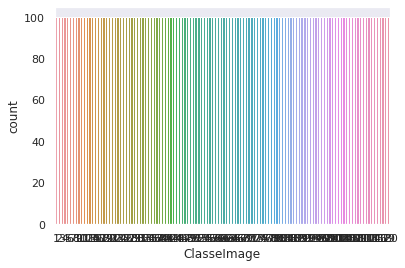

In [15]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="ClasseImage", data=TrainList_df)
print(TrainList_df.groupby(['ClasseImageLibelle']).count())
print(TrainList_df.groupby(['ClasseImageLibelle']).count().mean())
print(TrainList_df.groupby(['ClasseImageLibelle']).count().min())
print(TrainList_df.groupby(['ClasseImageLibelle']).count().max())

J'ai 100 images par race de chien pour l'entraînement.

Je créé une colonne avec le libellé de la classe pour le dataframe TestList_df

In [16]:
TestList_df[['ClasseImageLibelle']]=TestList_df[['NomImage']].applymap(getClassLibelle)
TestList_df

,NomImage,ClasseImage,ClasseImageLibelle
0,n02085620-Chihuahua/n02085620_2650.jpg,1,Chihuahua
1,n02085620-Chihuahua/n02085620_4919.jpg,1,Chihuahua
2,n02085620-Chihuahua/n02085620_1765.jpg,1,Chihuahua
3,n02085620-Chihuahua/n02085620_3006.jpg,1,Chihuahua
4,n02085620-Chihuahua/n02085620_1492.jpg,1,Chihuahua
...,...,...,...
8575,n02116738-African_hunting_dog/n02116738_4991.jpg,120,African_hunting_dog
8576,n02116738-African_hunting_dog/n02116738_3024.jpg,120,African_hunting_dog
8577,n02116738-African_hunting_dog/n02116738_3635.jpg,120,African_hunting_dog
8578,n02116738-African_hunting_dog/n02116738_2988.jpg,120,African_hunting_dog


J'affiche le nombre d'images de test par race de chien:

                                NomImage  ClasseImage
ClasseImageLibelle                                   
Afghan_hound                         139          139
African_hunting_dog                   69           69
Airedale                             102          102
American_Staffordshire_terrier        64           64
Appenzeller                           51           51
...                                  ...          ...
toy_poodle                            51           51
toy_terrier                           72           72
vizsla                                54           54
whippet                               87           87
wire                                  57           57

[120 rows x 2 columns]
NomImage       71.5
ClasseImage    71.5
dtype: float64
NomImage       48
ClasseImage    48
dtype: int64
NomImage       152
ClasseImage    152
dtype: int64


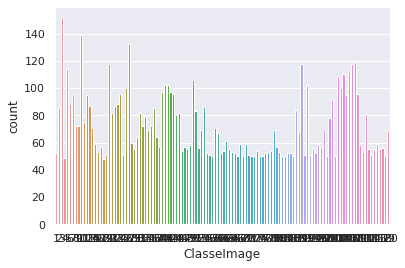

In [17]:
sns.set(style="darkgrid")
sns.countplot(x="ClasseImage", data=TestList_df)
print(TestList_df.groupby(['ClasseImageLibelle']).count())
print(TestList_df.groupby(['ClasseImageLibelle']).count().mean())
print(TestList_df.groupby(['ClasseImageLibelle']).count().min())
print(TestList_df.groupby(['ClasseImageLibelle']).count().max())

J'ai entre 48 et 152 images par race de chien pour la validation et le test.

Je charge une image

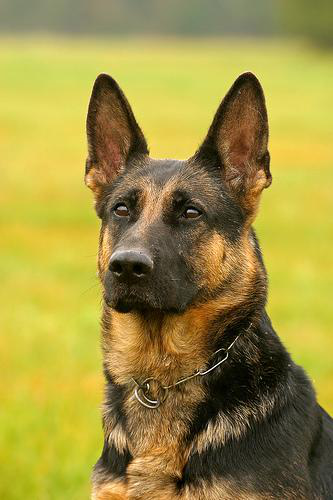

In [17]:
img = Image.open(os.path.join(IMAGE_FOLDER_PATH,TrainList_df['NomImage'][8400]))
display(img) 

Création d'une fonction pour éliminer les images corrompues ou qui n'existent pas:

In [18]:
def remove_corupted_files(DataFrame):
    num_skipped = 0
    num_absent = 0
    is_jfif = False
    for FileName in DataFrame['NomImage']:
        fpath = os.path.join(IMAGE_FOLDER_PATH, FileName)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
            fobj.close()
        except:
            #retire une image qui n'existe pas
            #print(FileName)
            num_absent += 1
            DataFrame = DataFrame[DataFrame['NomImage']!=FileName]
            

        if not is_jfif:
            num_skipped += 1
            os.remove(fpath)
            DataFrame = DataFrame[DataFrame['NomImage']!=FileName]

    print("Nombre images supprimées: %d" % num_skipped)
    print("Nombre images absentes: %d" % num_absent)
    return DataFrame

In [19]:
FileList_df_2 = remove_corupted_files(FileList_df)

Nombre images supprimées: 10
Nombre images absentes: 0


In [20]:
TrainList_df_2 = remove_corupted_files(TrainList_df)

Nombre images supprimées: 0
Nombre images absentes: 6


In [21]:
TestList_df_2 = remove_corupted_files(TestList_df)

Nombre images supprimées: 0
Nombre images absentes: 4


### Preprocessing des images

Création des images recadrées sur les chiens :

In [25]:
#nombre d'images recentrées
i=0 

#Début chronomètre
start = time.time()

#créer le dossier pour accueillir les images re-centrées
isExist = os.path.exists(CROPED_IMAGE_FOLDER_PATH)
  
if not isExist:
  # Create a new directory because it does not exist 
  os.makedirs(CROPED_IMAGE_FOLDER_PATH)

for img_anno in FileList_df_2['AnnotationList']:

  #récupérer les coordonnées de la bounding box
  with open(os.path.join(ANNOTATION_PATH,img_anno), 'r') as f:
      data = f.read()

  Bs_data = BeautifulSoup(data, "xml")
  
  xmin=int(Bs_data.find('xmin').get_text())
  ymin=int(Bs_data.find('ymin').get_text())
  xmax=int(Bs_data.find('xmax').get_text())
  ymax=int(Bs_data.find('ymax').get_text())

  img_name = img_anno + '.jpg'

  #Récupérer l'image originelle
  img = Image.open(os.path.join(IMAGE_FOLDER_PATH,img_name))

  #Création de l'image re-centrée
  cropped_image = img.crop((xmin,ymin,xmax,ymax))

  # Créer le dossier s'il n'existe pas
  img_cropped_array = img_anno.split('/')
  img_cropped_folder = os.path.join(CROPED_IMAGE_FOLDER_PATH,img_cropped_array[0])

  isExist = os.path.exists(img_cropped_folder)

  if not isExist:
    # Create a new directory because it does not exist 
    os.makedirs(img_cropped_folder)

  #Enregistrement de l'image re-centrée
  cropped_image.save(os.path.join(CROPED_IMAGE_FOLDER_PATH,img_name))

  i+=1
  print("nombre d'images recentrées : "+str(i))

end = time.time()
print('Temps écoulé'+str(end-start))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
nombre d'images recentrées : 15572
nombre d'images recentrées : 15573
nombre d'images recentrées : 15574
nombre d'images recentrées : 15575
nombre d'images recentrées : 15576
nombre d'images recentrées : 15577
nombre d'images recentrées : 15578
nombre d'images recentrées : 15579
nombre d'images recentrées : 15580
nombre d'images recentrées : 15581
nombre d'images recentrées : 15582
nombre d'images recentrées : 15583
nombre d'images recentrées : 15584
nombre d'images recentrées : 15585
nombre d'images recentrées : 15586
nombre d'images recentrées : 15587
nombre d'images recentrées : 15588
nombre d'images recentrées : 15589
nombre d'images recentrées : 15590
nombre d'images recentrées : 15591
nombre d'images recentrées : 15592
nombre d'images recentrées : 15593
nombre d'images recentrées : 15594
nombre d'images recentrées : 15595
nombre d'images recentrées : 15596
nombre d'images recentrées : 15597
nombre d'ima

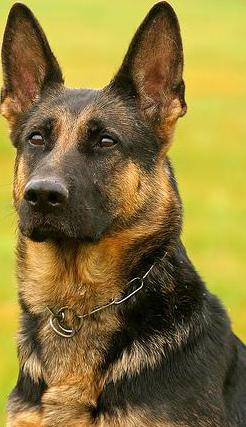

In [26]:
img = Image.open(os.path.join(CROPED_IMAGE_FOLDER_PATH,TrainList_df['NomImage'][8400]))
display(img) 

Création des images en niveaux de gris :

In [27]:
#nombre d'images recentrées
i=0 

#Début chronomètre
start = time.time()

#créer le dossier pour accueillir les images re-centrées
isExist = os.path.exists(GRAYSCALE_IMAGE_FOLDER_PATH)
  
if not isExist:
  # Create a new directory because it does not exist 
  os.makedirs(GRAYSCALE_IMAGE_FOLDER_PATH)

for img_anno in FileList_df_2['AnnotationList']:

  img_name = img_anno + '.jpg'

  #Récupérer l'image originelle
  img = Image.open(os.path.join(IMAGE_FOLDER_PATH,img_name))

  #Création de l'image en niveaux de gris
  grayscaled_image = ImageOps.grayscale(img)

  # Créer le dossier s'il n'existe pas
  img_grayscaled_array = img_anno.split('/')
  img_grayscaled_folder = os.path.join(GRAYSCALE_IMAGE_FOLDER_PATH,img_grayscaled_array[0])
  
  isExist = os.path.exists(img_grayscaled_folder)

  if not isExist:
    # Create a new directory because it does not exist 
    os.makedirs(img_grayscaled_folder)

  #Enregistrement de l'image re-centrée
  grayscaled_image.save(os.path.join(GRAYSCALE_IMAGE_FOLDER_PATH,img_name))

  i+=1
  print("nombre d'images en niveaux de gris : "+str(i))

end = time.time()
print('Temps écoulé'+str(end-start))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
nombre d'images en niveaux de gris : 15572
nombre d'images en niveaux de gris : 15573
nombre d'images en niveaux de gris : 15574
nombre d'images en niveaux de gris : 15575
nombre d'images en niveaux de gris : 15576
nombre d'images en niveaux de gris : 15577
nombre d'images en niveaux de gris : 15578
nombre d'images en niveaux de gris : 15579
nombre d'images en niveaux de gris : 15580
nombre d'images en niveaux de gris : 15581
nombre d'images en niveaux de gris : 15582
nombre d'images en niveaux de gris : 15583
nombre d'images en niveaux de gris : 15584
nombre d'images en niveaux de gris : 15585
nombre d'images en niveaux de gris : 15586
nombre d'images en niveaux de gris : 15587
nombre d'images en niveaux de gris : 15588
nombre d'images en niveaux de gris : 15589
nombre d'images en niveaux de gris : 15590
nombre d'images en niveaux de gris : 15591
nombre d'images en niveaux de gris : 15592
nombre d'images en 

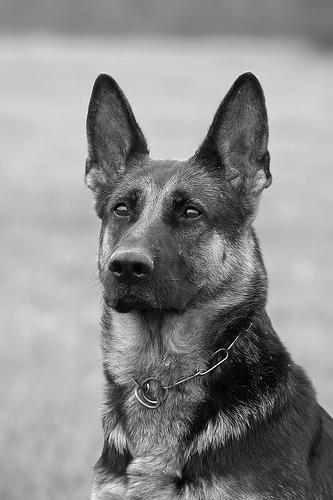

In [32]:
img = Image.open(os.path.join(GRAYSCALE_IMAGE_FOLDER_PATH,TrainList_df['NomImage'][8400]))
display(img) 

In [32]:
#ImageDataGenerator avec Data-augmentation
train_datagen_1 = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.3,
    width_shift_range=0.1,
    height_shift_range=0.1,
    channel_shift_range=0.1,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range=[0.3,1.0]
)

#ImageDataGenerator avec Data-augmentationen mode 'grayscale' au lieu de 'rgb'
train_datagen_2 = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.3,
    width_shift_range=0.1,
    height_shift_range=0.1,
    channel_shift_range=0.1,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range=[0.3,1.0]
)

#ImageDataGenerator sans Data-augmentation
train_datagen_3 = ImageDataGenerator(
    rescale=1.0/255,
)

#ImageDataGenerator avec Data-augmentationen mode 'rgb' pour les images recentrées
train_datagen_4 = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.3,
    width_shift_range=0.1,
    height_shift_range=0.1,
    channel_shift_range=0.1,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range=[0.3,1.0]
)

#Image générateur pour lots de validation et de test
valid_datagen_1 = ImageDataGenerator(
    rescale=1.0/255,
    validation_split = 0.5,
)


#Image générateur pour lots de validation et de test avec Data-augmentationen et mode 'grayscale' au lieu de 'rgb'
valid_datagen_2 = ImageDataGenerator(
    rescale=1.0/255,
    validation_split = 0.5,
)



Je dois fitter mes générateur d'images:

Je créé un tableau avec les images originelles

In [28]:
X_fitting = []
folder_path = os.path.join(IMAGE_FOLDER_PATH)
nb_image=0

#Début chronomètre
start = time.time()

#for imgPath in folder_path:
for FileName in TrainList_df_2['NomImage']:
    imgPath = os.path.join(folder_path, FileName)
    nb_image+=1
    
    try:
        img = cv2.imread(imgPath, -1)
        img = cv2.resize(img, (IMAGE_WIDTH,IMAGE_HEIGHT))
        img = np.array(img, dtype="float")

        X_fitting.append(img)
    except:
        print(imgPath)


end = time.time()
print('Temps écoulé'+str(end-start))

Temps écoulé41.61422109603882


Je créé un tableau avec les images recentrées:

In [29]:
X_fitting_cropped = []
folder_path = os.path.join(CROPED_IMAGE_FOLDER_PATH)
nb_image=0

#Début chronomètre
start = time.time()

#for imgPath in folder_path:
for FileName in TrainList_df_2['NomImage']:
    imgPath = os.path.join(folder_path, FileName)
    nb_image+=1
    
    try:
        img = cv2.imread(imgPath, -1)
        img = cv2.resize(img, (IMAGE_WIDTH,IMAGE_HEIGHT))
        img = np.array(img, dtype="float")

        X_fitting_cropped.append(img)
    except:
        print(imgPath)


end = time.time()
print('Temps écoulé'+str(end-start))

Temps écoulé27.189270496368408


Je créé un tableau avec les images en niveaux de gris:

In [30]:
X_fitting_grayscaled = []
folder_path = os.path.join(GRAYSCALE_IMAGE_FOLDER_PATH)
nb_image=0

#Début chronomètre
start = time.time()

#for imgPath in folder_path:
for FileName in TrainList_df_2['NomImage']:
    imgPath = os.path.join(folder_path, FileName)
    nb_image+=1
    
    try:
        img = cv2.imread(imgPath, -1)
        img = cv2.resize(img, (IMAGE_WIDTH,IMAGE_HEIGHT))
        img = np.array(img, dtype="float")

        X_fitting_grayscaled.append(img)
    except:
        print(imgPath)


end = time.time()
print('Temps écoulé'+str(end-start))

Temps écoulé18.560264587402344


In [31]:
X_fitting_grayscaled = np.reshape(X_fitting_grayscaled,[-1, IMAGE_WIDTH,IMAGE_HEIGHT, 1])

In [64]:
#Début chronomètre
start = time.time()

train_datagen_1.fit(X_fitting)
train_datagen_2.fit(X_fitting_grayscaled)
train_datagen_3.fit(X_fitting)
train_datagen_4.fit(X_fitting_cropped)
valid_datagen_1.fit(X_fitting)
valid_datagen_2.fit(X_fitting_grayscaled)

end = time.time()
print('Temps écoulé'+str(end-start))

Création des train et test Datasets 

je créé les générateurs de data augmentation à partir des dataframes:

In [65]:
#générateur d'image avec data-augmentation en mode rgb
train_generator_1 = train_datagen_1.flow_from_dataframe(
    dataframe = TrainList_df_2,
    directory = IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode ='categorical',
    shuffle = True,
    verbale=2,
    seed = 1
)

#générateur d'image avec data-augmentation en mode grayscale
train_generator_2 = train_datagen_2.flow_from_dataframe(
    dataframe = TrainList_df_2,
    directory = GRAYSCALE_IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode ='categorical',
    shuffle = True,
    verbale=2,
    seed = 1
)


#générateur d'image sans data-augmentation
train_generator_3 = train_datagen_3.flow_from_dataframe(
    dataframe = TrainList_df_2,
    directory = IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode ='categorical',
    shuffle = True,
    verbale=2,
    seed = 1
)

#générateur d'image avec data-augmentation en mode rgb et recadrage sur les chiens
train_generator_4 = train_datagen_4.flow_from_dataframe(
    dataframe = TrainList_df_2,
    directory = CROPED_IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode ='categorical',
    shuffle = True,
    verbale=2,
    seed = 1
)

#générateur d'images de validation RGB
validation_generator_1 = valid_datagen_1.flow_from_dataframe(
    dataframe = TestList_df_2,
    directory = IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode = COLOR_MODE,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation',
    seed = 1
)

#générateur d'images de test RGB
test_generator_1 = valid_datagen_1.flow_from_dataframe(
    dataframe=TestList_df_2,
    directory=IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True,
    seed = 1
)

#générateur d'images de validation Grayscale
validation_generator_2 = valid_datagen_2.flow_from_dataframe(
    dataframe = TestList_df_2,
    directory = GRAYSCALE_IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode = COLOR_MODE,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation',
    seed = 1
)

#générateur d'images de test Grayscale
test_generator_2 = valid_datagen_2.flow_from_dataframe(
    dataframe=TestList_df_2,
    directory=GRAYSCALE_IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True,
    seed = 1
)

Found 11994 validated image filenames belonging to 120 classes.
Found 11994 validated image filenames belonging to 120 classes.
Found 11994 validated image filenames belonging to 120 classes.
Found 11994 validated image filenames belonging to 120 classes.
Found 4288 validated image filenames belonging to 120 classes.
Found 4288 validated image filenames belonging to 120 classes.
Found 4288 validated image filenames belonging to 120 classes.
Found 4288 validated image filenames belonging to 120 classes.


Visualisation d'un extrait des images créées : 

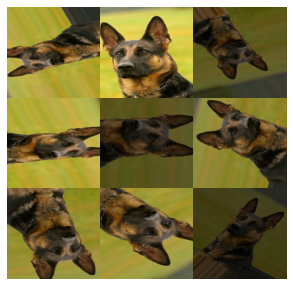

In [43]:
img = load_img(os.path.join(IMAGE_FOLDER_PATH,TrainList_df['NomImage'][8400]))

# For processing, we are converting the image(s) to an array
data = img_to_array(img)

# Expanding dimension to one sample
samples = np.expand_dims(data, 0)

# Creating an iterator for data augmentation
it = train_datagen_1.flow(samples, batch_size=1)

plt.figure(figsize=(5, 5))
# Preparing the Samples and Plot for displaying output
for i in range(9):
  # preparing the subplot
  plt.subplot(330 + 1 + i)
  # generating images in batches
  batch = it.next()
  plt.axis('off')
  plt.imshow(batch[0],aspect='auto')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

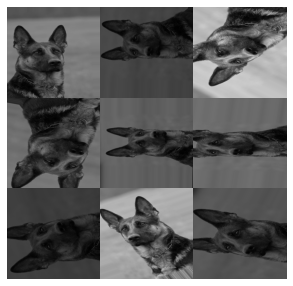

In [44]:
img = load_img(os.path.join(GRAYSCALE_IMAGE_FOLDER_PATH,TrainList_df['NomImage'][8400]))

# For processing, we are converting the image(s) to an array
data = img_to_array(img)

# Expanding dimension to one sample
samples = np.expand_dims(data, 0)

# Creating an iterator for data augmentation
it = train_datagen_2.flow(samples, batch_size=1)

plt.figure(figsize=(5, 5))
# Preparing the Samples and Plot for displaying output
for i in range(9):
  # preparing the subplot
  plt.subplot(330 + 1 + i)
  # generating images in batches
  batch = it.next()
  plt.axis('off')
  plt.imshow(batch[0],aspect='auto')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

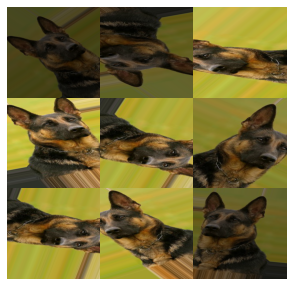

In [45]:
img = load_img(os.path.join(CROPED_IMAGE_FOLDER_PATH,TrainList_df['NomImage'][8400]))

# For processing, we are converting the image(s) to an array
data = img_to_array(img)

# Expanding dimension to one sample
samples = np.expand_dims(data, 0)

# Creating an iterator for data augmentation
it = train_datagen_4.flow(samples, batch_size=1)

plt.figure(figsize=(5, 5))
# Preparing the Samples and Plot for displaying output
for i in range(9):
  # preparing the subplot
  plt.subplot(330 + 1 + i)
  # generating images in batches
  batch = it.next()
  plt.axis('off')
  plt.imshow(batch[0],aspect='auto')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

Définition d'une fonction de construction d'un réseau de neurones

In [66]:
def build_model_from_scratch(image_width,image_height,padding='valid',size=256,dropout_regularization=False):

#paramètres:
#padding: valid/same
#size: 256/512
#dropout_regularization: True/False

    model = keras.Sequential()

    model.add(layers.Conv2D(32, 3, padding=padding, input_shape=(image_width, image_height, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    if dropout_regularization:
        model.add(layers.Dropout(0.15))

    model.add(layers.Conv2D(64, 3, padding=padding))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    if dropout_regularization:
        model.add(layers.Dropout(0.15))

    model.add(layers.Conv2D(128, 3, padding=padding))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    if dropout_regularization:
        model.add(layers.Dropout(0.15))

    model.add(layers.Conv2D(256, 3, padding=padding))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    if dropout_regularization:
        model.add(layers.Dropout(0.15))
    
    if size==512 and dropout_regularization:
        model.add(layers.Conv2D(512, 3, padding=padding))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation("relu"))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(layers.Dropout(0.15))
        model.add(layers.Flatten())
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.Dropout(0.15))
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.Dense(120, activation="softmax"))
    
    elif size==512 and dropout_regularization==False:
        model.add(layers.Conv2D(512, 3, padding=padding))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation("relu"))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(layers.Flatten())
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.Dense(120, activation="softmax"))
    
    elif size!=512 and dropout_regularization:
        model.add(layers.Flatten())
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.Dropout(0.15))      
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.Dense(120, activation="softmax"))
        
    elif size!=512 and dropout_regularization==False:
        model.add(layers.Flatten())
        model.add(layers.Dense(512, activation='relu'))    
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.Dense(120, activation="softmax"))

    return model

Création d'une fonction pour fiter le model, grapher l'accuracy et calculer la performance sur les test dataset.

In [67]:
def fit_test_plot_model(nom_model, model_CNN, epochs,train_generator,validation_generator,test_generator):

    #categorical_crossentropy
    model_CNN.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )


    file_name = "save_dogs_deep_learning_{}.h5".format(nom_model)
    checkpoint = keras.callbacks.ModelCheckpoint(
        file_name,
        monitor='val_loss',
        verbose=1,
        save_best_only=True,
        mode='auto',
        save_weights_only=False
    )

    earlystop = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=5,
        verbose=1,
        mode='auto'
    )

    reduceLR = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=3,
        verbose=1, 
        mode='auto'
    )

    callbacks = [checkpoint]

    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
    STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
    
    fitted_model = model_CNN.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch = STEP_SIZE_TRAIN,
        validation_data = validation_generator,
        validation_steps = STEP_SIZE_VALID,
        callbacks=callbacks,
        verbose = 2
    )
    
    #Afficher le model summary
    print(model_CNN.summary())
    

    #ax.axhline(y=mean_baseline, color="lightcoral", linestyle="dashed")

    #Plot the training history
    plt.figure(figsize=(12, 5))
    plt.plot(fitted_model.history['accuracy'], color='r')
    plt.plot(fitted_model.history['val_accuracy'], color='b')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'val'])
    plt.show()
    
    #Plot the loss history
    plt.figure(figsize=(12, 5))
    plt.plot(fitted_model.history['loss'], color='r')
    plt.plot(fitted_model.history['val_loss'], color='b')
    plt.title('Model Loss')
    plt.ylabel('LDroposs')
    plt.xlabel('Epochs')
    plt.legend(['train', 'val'])
    plt.show()
    
    test_loss, test_acc = model_CNN.evaluate(test_generator, steps= STEP_SIZE_TEST, verbose=2)

    print('\nTest accuracy:', test_acc)
    print('\nTest Loss:', test_loss)
    #model_1.build((11000, IMAGE_WIDTH, IMAGE_HEIGHT, 3))

# Model CNN entièrement construit et entraîné

Scénario 1 : Padding/Valid - Size/256 - Regularization/Non - Color/RGB - Centrée/Non - Data-augmentation/Oui :

Epoch 1/100

Epoch 1: val_loss improved from inf to 4.71148, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_valid.h5
374/374 - 192s - loss: 4.8242 - accuracy: 0.0148 - val_loss: 4.7115 - val_accuracy: 0.0119 - 192s/epoch - 514ms/step
Epoch 2/100

Epoch 2: val_loss improved from 4.71148 to 4.51704, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_valid.h5
374/374 - 180s - loss: 4.5905 - accuracy: 0.0239 - val_loss: 4.5170 - val_accuracy: 0.0238 - 180s/epoch - 482ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 4.51704
374/374 - 181s - loss: 4.4525 - accuracy: 0.0269 - val_loss: 4.5544 - val_accuracy: 0.0310 - 181s/epoch - 485ms/step
Epoch 4/100

Epoch 4: val_loss improved from 4.51704 to 4.44987, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_valid.h5
374/374 - 181s - loss: 4.3856 - accuracy: 0.0347 - val_loss: 4.4499 - val_accuracy: 0.0329 - 181s/epoch - 483ms/step
Epoch 5/100

Epoch 5: val_loss improved from 4.44987 

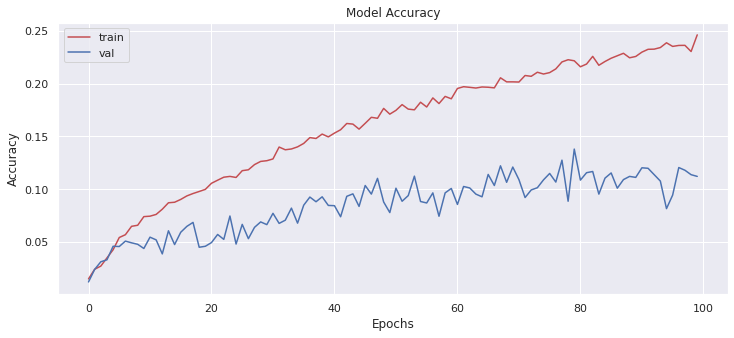

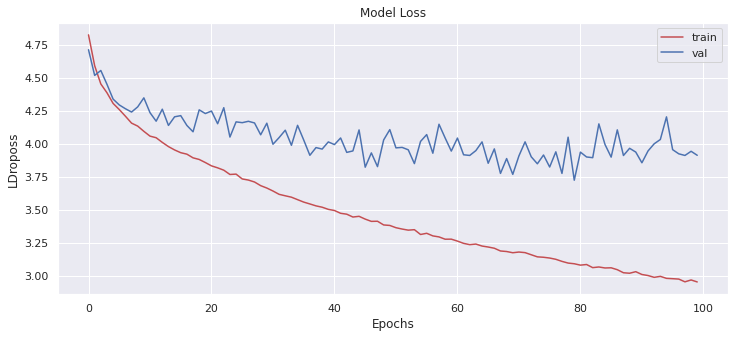

134/134 - 16s - loss: 3.7236 - accuracy: 0.1709 - 16s/epoch - 119ms/step

Test accuracy: 0.17094215750694275

Test Loss: 3.7236483097076416


In [46]:
model_1 = build_model_from_scratch(IMAGE_WIDTH, IMAGE_HEIGHT,padding='valid',size=256,dropout_regularization=False)
fit_test_plot_model("scratch_256_NO_Reg_padding_valid", model_1, NB_EPOCH,train_generator_1,validation_generator,test_generator)

Scénario 2 : Padding/Valid - Size/256 - Regularization/Oui - Color/RGB - Centrée/Non - Data-augmentation/Oui :

Epoch 1/100

Epoch 1: val_loss improved from inf to 4.75569, saving model to save_dogs_deep_learning_scratch_256_YES_Reg_padding_valid.h5
374/374 - 182s - loss: 4.8347 - accuracy: 0.0094 - val_loss: 4.7557 - val_accuracy: 0.0091 - 182s/epoch - 487ms/step
Epoch 2/100

Epoch 2: val_loss improved from 4.75569 to 4.64613, saving model to save_dogs_deep_learning_scratch_256_YES_Reg_padding_valid.h5
374/374 - 179s - loss: 4.7361 - accuracy: 0.0149 - val_loss: 4.6461 - val_accuracy: 0.0382 - 179s/epoch - 478ms/step
Epoch 3/100

Epoch 3: val_loss improved from 4.64613 to 4.57872, saving model to save_dogs_deep_learning_scratch_256_YES_Reg_padding_valid.h5
374/374 - 178s - loss: 4.6653 - accuracy: 0.0197 - val_loss: 4.5787 - val_accuracy: 0.0282 - 178s/epoch - 476ms/step
Epoch 4/100

Epoch 4: val_loss improved from 4.57872 to 4.52368, saving model to save_dogs_deep_learning_scratch_256_YES_Reg_padding_valid.h5
374/374 - 176s - loss: 4.6335 - accuracy: 0.0192 - val_loss: 4.5237 - val_accuracy: 0

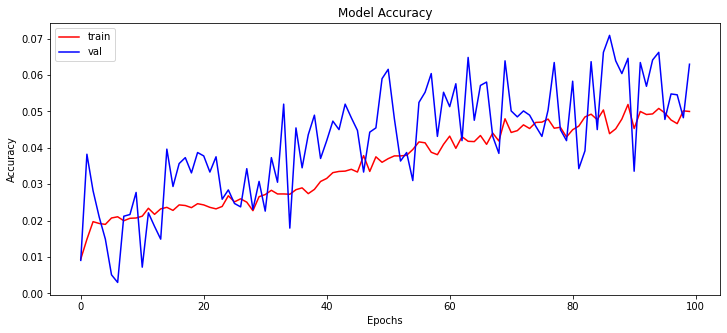

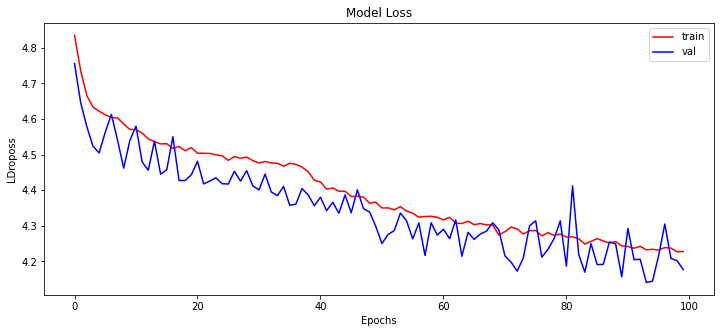

134/134 - 16s - loss: 4.2975 - accuracy: 0.0546 - 16s/epoch - 116ms/step

Test accuracy: 0.054570894688367844

Test Loss: 4.2975239753723145


In [38]:
model_2 = build_model_from_scratch(IMAGE_WIDTH, IMAGE_HEIGHT,padding='valid',size=256,dropout_regularization=True)
fit_test_plot_model("scratch_256_YES_Reg_padding_valid", model_2, NB_EPOCH,train_generator_1,validation_generator,test_generator)

Scénario 3 : Padding/Same - Size/256 - Regularization/Non - Color/RGB - Centrée/Non - Data-augmentation/Oui :

Epoch 1/100

Epoch 1: val_loss improved from inf to 4.83486, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_same.h5
374/374 - 181s - loss: 4.8294 - accuracy: 0.0104 - val_loss: 4.8349 - val_accuracy: 0.0133 - 181s/epoch - 485ms/step
Epoch 2/100

Epoch 2: val_loss improved from 4.83486 to 4.73298, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_same.h5
374/374 - 178s - loss: 4.6564 - accuracy: 0.0188 - val_loss: 4.7330 - val_accuracy: 0.0296 - 178s/epoch - 476ms/step
Epoch 3/100

Epoch 3: val_loss improved from 4.73298 to 4.59063, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_same.h5
374/374 - 176s - loss: 4.5795 - accuracy: 0.0215 - val_loss: 4.5906 - val_accuracy: 0.0070 - 176s/epoch - 470ms/step
Epoch 4/100

Epoch 4: val_loss improved from 4.59063 to 4.48244, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_same.h5
374/374 - 175s - loss: 4.4918 - accuracy: 0.0232 - val_loss: 4.4824 - val_accuracy: 0.0268 - 

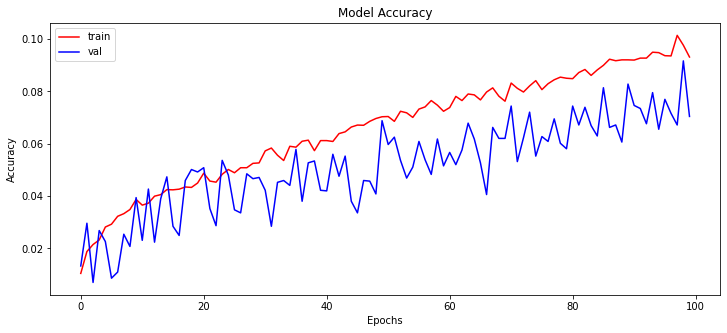

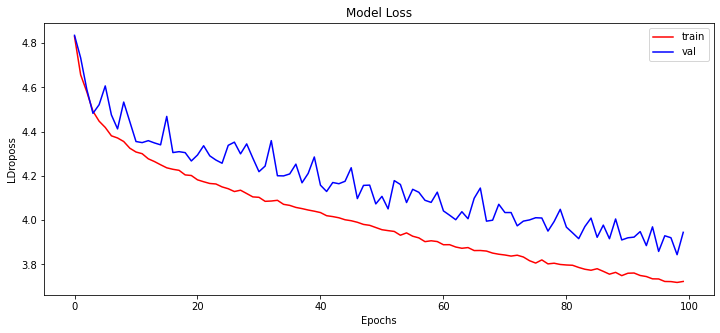

134/134 - 15s - loss: 3.8516 - accuracy: 0.0903 - 15s/epoch - 112ms/step

Test accuracy: 0.0902518630027771

Test Loss: 3.8516199588775635


In [39]:
model_3 = build_model_from_scratch(IMAGE_WIDTH, IMAGE_HEIGHT,padding='same',size=256,dropout_regularization=False)
fit_test_plot_model("scratch_256_NO_Reg_padding_same", model_3, NB_EPOCH,train_generator_1,validation_generator_1,test_generator_1)

Scénario 4 : Padding/Valid - Size/512 - Regularization/Non - Color/RGB - Centrée/Non - Data-augmentation/Oui :

Epoch 1/100

Epoch 1: val_loss improved from inf to 4.76334, saving model to save_dogs_deep_learning_scratch_512_NO_Reg_padding_valid.h5
374/374 - 167s - loss: 4.7497 - accuracy: 0.0166 - val_loss: 4.7633 - val_accuracy: 6.9963e-04 - 167s/epoch - 446ms/step
Epoch 2/100

Epoch 2: val_loss improved from 4.76334 to 4.55057, saving model to save_dogs_deep_learning_scratch_512_NO_Reg_padding_valid.h5
374/374 - 157s - loss: 4.5091 - accuracy: 0.0302 - val_loss: 4.5506 - val_accuracy: 0.0324 - 157s/epoch - 420ms/step
Epoch 3/100

Epoch 3: val_loss improved from 4.55057 to 4.32762, saving model to save_dogs_deep_learning_scratch_512_NO_Reg_padding_valid.h5
374/374 - 157s - loss: 4.3800 - accuracy: 0.0409 - val_loss: 4.3276 - val_accuracy: 0.0431 - 157s/epoch - 419ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 4.32762
374/374 - 157s - loss: 4.2915 - accuracy: 0.0458 - val_loss: 4.3632 - val_accuracy: 0.0506 - 157s/epoch - 419ms/step
Epoch 5/100

Epoch 5: val_loss improved from 4.32

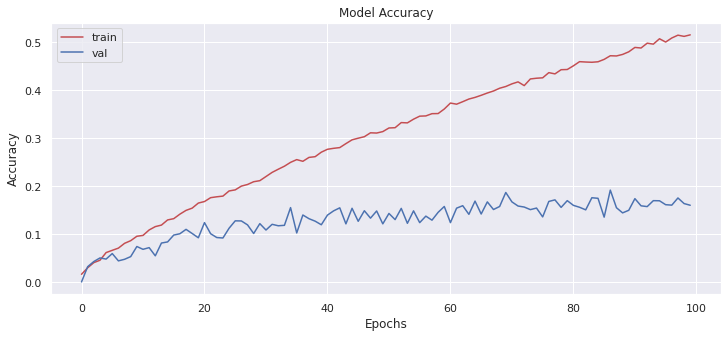

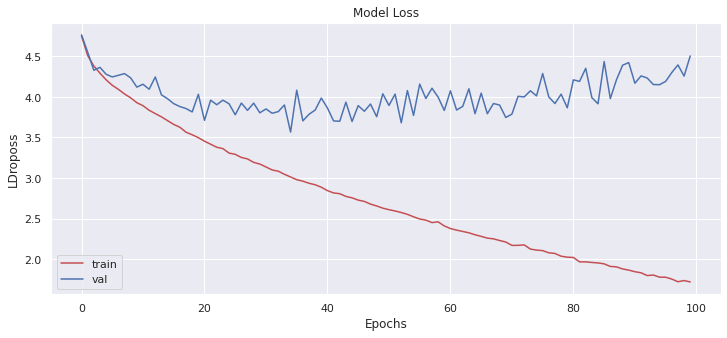

134/134 - 14s - loss: 4.2977 - accuracy: 0.2139 - 14s/epoch - 101ms/step

Test accuracy: 0.21385261416435242

Test Loss: 4.297701835632324


In [41]:
model_4 = build_model_from_scratch(IMAGE_WIDTH,IMAGE_HEIGHT,padding='valid',size=512,dropout_regularization=False)
fit_test_plot_model("scratch_512_NO_Reg_padding_valid", model_4, NB_EPOCH,train_generator_1,validation_generator,test_generator)

Scénario 5 : Padding/Valid - Size/256 - Regularization/Non - Color/Gray - Centrée/Non - Data-augmentation/Oui :

Epoch 1/100

Epoch 1: val_loss improved from inf to 4.75980, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_valid.h5
374/374 - 146s - loss: 4.8356 - accuracy: 0.0111 - val_loss: 4.7598 - val_accuracy: 0.0042 - 146s/epoch - 391ms/step
Epoch 2/100

Epoch 2: val_loss improved from 4.75980 to 4.65343, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_valid.h5
374/374 - 143s - loss: 4.6686 - accuracy: 0.0166 - val_loss: 4.6534 - val_accuracy: 0.0247 - 143s/epoch - 382ms/step
Epoch 3/100

Epoch 3: val_loss improved from 4.65343 to 4.63107, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_valid.h5
374/374 - 144s - loss: 4.6072 - accuracy: 0.0181 - val_loss: 4.6311 - val_accuracy: 0.0317 - 144s/epoch - 385ms/step
Epoch 4/100

Epoch 4: val_loss improved from 4.63107 to 4.56401, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_valid.h5
374/374 - 144s - loss: 4.5618 - accuracy: 0.0223 - val_loss: 4.5640 - val_accuracy: 0.028

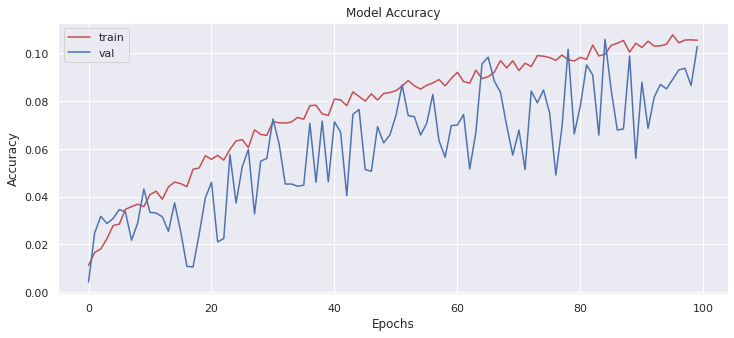

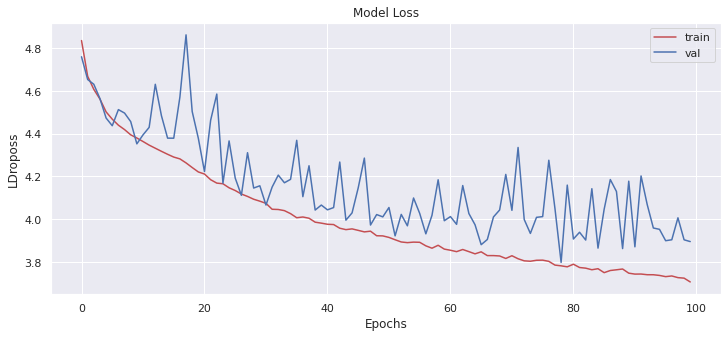

134/134 - 9s - loss: 4.0102 - accuracy: 0.0858 - 9s/epoch - 70ms/step

Test accuracy: 0.08582089841365814

Test Loss: 4.010248184204102


In [71]:
model_5 = build_model_from_scratch(IMAGE_WIDTH, IMAGE_HEIGHT,padding='valid',size=256,dropout_regularization=False)
fit_test_plot_model("scratch_256_NO_Reg_padding_valid", model_5, NB_EPOCH,train_generator_2,validation_generator_2,test_generator_2)

Scénario 6 : Padding/Valid - Size/256 - Regularization/Non - Color/RGB - Centrée/Non - Data-augmentation/Non :

Epoch 1/100

Epoch 1: val_loss improved from inf to 4.68110, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_valid.h5
374/374 - 64s - loss: 4.7411 - accuracy: 0.0206 - val_loss: 4.6811 - val_accuracy: 0.0299 - 64s/epoch - 172ms/step
Epoch 2/100

Epoch 2: val_loss improved from 4.68110 to 4.35200, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_valid.h5
374/374 - 54s - loss: 4.3230 - accuracy: 0.0548 - val_loss: 4.3520 - val_accuracy: 0.0441 - 54s/epoch - 145ms/step
Epoch 3/100

Epoch 3: val_loss improved from 4.35200 to 4.21479, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_valid.h5
374/374 - 53s - loss: 4.0104 - accuracy: 0.0942 - val_loss: 4.2148 - val_accuracy: 0.0683 - 53s/epoch - 143ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 4.21479
374/374 - 54s - loss: 3.7348 - accuracy: 0.1337 - val_loss: 4.2892 - val_accuracy: 0.0646 - 54s/epoch - 144ms/step
Epoch 5/100

Epoch 5: val_loss improved from 4.21479 to 4.170

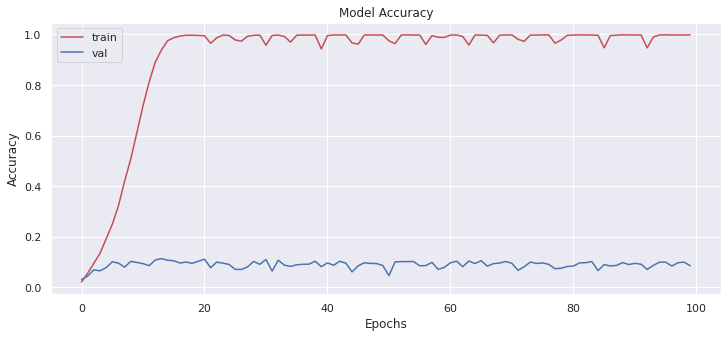

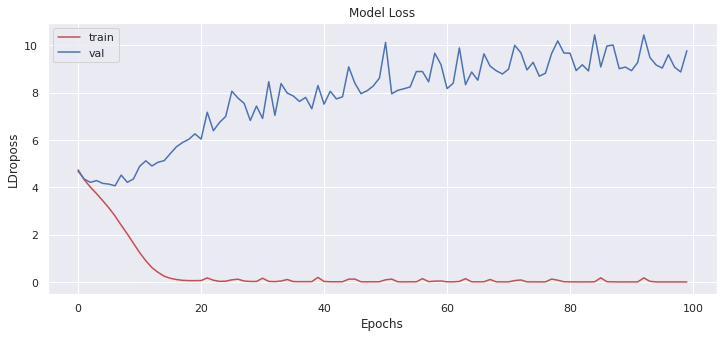

134/134 - 14s - loss: 9.5517 - accuracy: 0.0938 - 14s/epoch - 104ms/step

Test accuracy: 0.09375

Test Loss: 9.551725387573242


In [57]:
model_6 = build_model_from_scratch(IMAGE_WIDTH, IMAGE_HEIGHT,padding='valid',size=256,dropout_regularization=False)
fit_test_plot_model("scratch_256_NO_Reg_padding_valid", model_6, NB_EPOCH,train_generator_3,validation_generator_1,test_generator_1)

Scénario 7 : Padding/Valid - Size/256 - Regularization/Non - Color/RGB - Centrée/Oui - Data-augmentation/Oui :



Epoch 1/100

Epoch 1: val_loss improved from inf to 4.79415, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_same.h5
374/374 - 146s - loss: 4.6771 - accuracy: 0.0207 - val_loss: 4.7941 - val_accuracy: 0.0268 - 146s/epoch - 392ms/step
Epoch 2/100

Epoch 2: val_loss improved from 4.79415 to 4.51539, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_same.h5
374/374 - 144s - loss: 4.3818 - accuracy: 0.0395 - val_loss: 4.5154 - val_accuracy: 0.0410 - 144s/epoch - 384ms/step
Epoch 3/100

Epoch 3: val_loss improved from 4.51539 to 4.36410, saving model to save_dogs_deep_learning_scratch_256_NO_Reg_padding_same.h5
374/374 - 144s - loss: 4.2506 - accuracy: 0.0501 - val_loss: 4.3641 - val_accuracy: 0.0515 - 144s/epoch - 385ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 4.36410
374/374 - 143s - loss: 4.1437 - accuracy: 0.0593 - val_loss: 4.4707 - val_accuracy: 0.0431 - 143s/epoch - 383ms/step
Epoch 5/100

Epoch 5: val_loss did not improve from 4.36

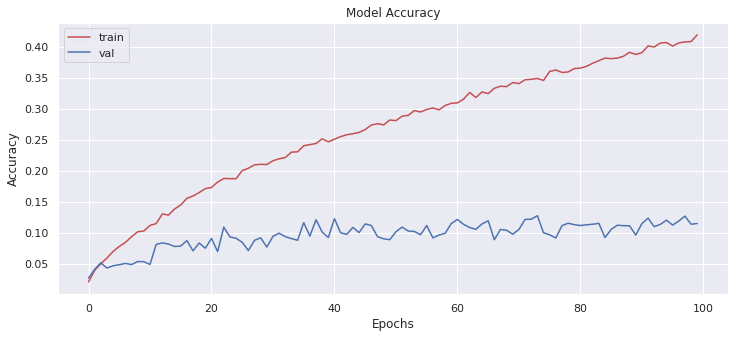

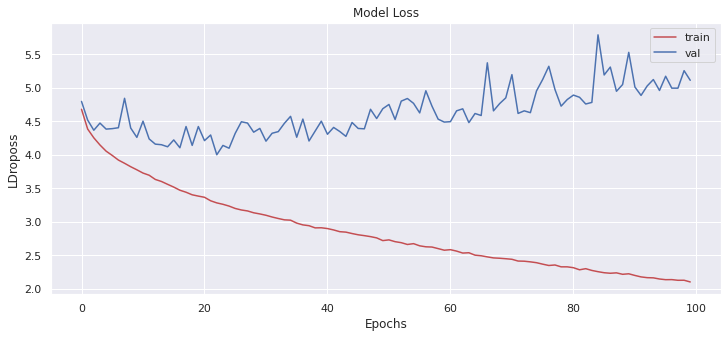

134/134 - 14s - loss: 4.7530 - accuracy: 0.1625 - 14s/epoch - 101ms/step

Test accuracy: 0.16254663467407227

Test Loss: 4.752955913543701


In [43]:
model_7 = build_model_from_scratch(IMAGE_WIDTH, IMAGE_HEIGHT,padding='valid',size=256,dropout_regularization=False)
fit_test_plot_model("scratch_256_NO_Reg_padding_same", model_7, NB_EPOCH,train_generator_4,validation_generator,test_generator)

# Ré-utilisation d'un modèle pré-entraîné VGG16 (Transfer Learning):

In [34]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NB_EPOCH = 100

In [107]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

Définition d'une fonction de construction d'un modèle avec un transfert learning

In [108]:
def build_model_from_transfert_learning():

#paramètres:
#padding: valid/same
#size: 256/512
#dropout_regularization: True/False
    
    # Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
    model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    
     #Je choisis de n'entraîner que le classifieur
    for layer in model.layers:
        layer.trainable = False
    
    #Flatten the output from second last fully connected layer in VGG
    flatten_layer = keras.layers.Flatten()(model.output)
    
    #fully connected layer with 512 hidden units and ReLu activation
    flattened_fc_layer = keras.layers.Dense(512, activation='relu')(flatten_layer)
    
    #the last fully connected sigmoid layer with 120 neurons
    flattened_fc_softmax_layer = keras.layers.Dense(120, activation='softmax')(flattened_fc_layer)
    
    # Définir le nouveau modèle
    new_model = Model(inputs=model.input, outputs=flattened_fc_softmax_layer)
    
    return new_model
  

In [33]:
def fit_test_plot_model(nom_model, model_CNN, epochs,train_generator,validation_generator,test_generator):

    #categorical_crossentropy
    model_CNN.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )


    file_name = "save_dogs_deep_learning_{}.h5".format(nom_model)
    checkpoint = keras.callbacks.ModelCheckpoint(
        file_name,
        monitor='val_loss',
        verbose=1,
        save_best_only=True,
        mode='auto',
        save_weights_only=True
    )

    earlystop = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=6,
        verbose=1,
        mode='auto'
    )

    reduceLR = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=3,
        verbose=1, 
        mode='auto'
    )

    callbacks = [checkpoint,earlystop, reduceLR]

    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
    STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
    
    fitted_model = model_CNN.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch = STEP_SIZE_TRAIN,
        validation_data = validation_generator,
        validation_steps = STEP_SIZE_VALID,
        callbacks=callbacks,
        verbose = 2
    )
    
    #Afficher le model summary
    print(model_CNN.summary())
    

    #ax.axhline(y=mean_baseline, color="lightcoral", linestyle="dashed")

    #Plot the training history
    plt.figure(figsize=(12, 5))
    plt.plot(fitted_model.history['accuracy'], color='r')
    plt.plot(fitted_model.history['val_accuracy'], color='b')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'val'])
    plt.show()
    
    #Plot the loss history
    plt.figure(figsize=(12, 5))
    plt.plot(fitted_model.history['loss'], color='r')
    plt.plot(fitted_model.history['val_loss'], color='b')
    plt.title('Model Loss')
    plt.ylabel('LDroposs')
    plt.xlabel('Epochs')
    plt.legend(['train', 'val'])
    plt.show()
    
    test_loss, test_acc = model_CNN.evaluate(test_generator, steps= STEP_SIZE_TEST, verbose=2)

    print('\nTest accuracy:', test_acc)
    print('\nTest Loss:', test_loss)

In [41]:
X_fitting = []
folder_path = os.path.join(IMAGE_FOLDER_PATH)
nb_image=0

#Début chronomètre
start = time.time()

#for imgPath in folder_path:
for FileName in TrainList_df_2['NomImage']:
    imgPath = os.path.join(folder_path, FileName)
    nb_image+=1
    
    #avec une ouverture avec Pillow
    try:
        #loadedImg = load_img(imgPath, color_mode=COLOR_MODE, target_size=(IMAGE_WIDTH,IMAGE_HEIGHT))
        #img = img_to_array(loadedImg)
        img = cv2.imread(imgPath, -1)
        img = cv2.resize(img, (IMAGE_WIDTH,IMAGE_HEIGHT))
        img = np.array(img, dtype="float")

        X_fitting.append(img)
    except:
        print(imgPath)
        X_fitting=X_fitting

end = time.time()
print('Temps écoulé'+str(end-start))

Temps écoulé71.77076458930969


Création du modèle, entraînement et graphiques de performances :

In [112]:
train_datagen_VGG16_1 = ImageDataGenerator(
    zoom_range=0.3,
    width_shift_range=0.1,
    height_shift_range=0.1,
    channel_shift_range=0.1,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range=[0.3,1.0],
    preprocessing_function=preprocess_input
)

train_datagen_VGG16_2 = ImageDataGenerator(
    zoom_range=0.3,
    width_shift_range=0.1,
    height_shift_range=0.1,
    channel_shift_range=0.1,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range=[0.3,1.0],
    preprocessing_function=preprocess_input
)

validation_datagen_VGG16_1 = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.5,
)

validation_datagen_VGG16_2 = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.5,
)

In [113]:
train_datagen_VGG16_1.fit(X_fitting)
validation_datagen_VGG16_1.fit(X_fitting)
train_datagen_VGG16_2.fit(X_fitting_cropped)
validation_datagen_VGG16_2.fit(X_fitting_cropped)

In [114]:
train_generator_VGG16_1 = train_datagen_VGG16_1.flow_from_dataframe(
    dataframe = TrainList_df_2,
    directory = IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode ='categorical',
    shuffle = True,
    verbale=2
)

validation_generator_VGG16_1 = validation_datagen_VGG16_1.flow_from_dataframe(
    dataframe = TrainList_df_2,
    directory = IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation',
    seed =1
)

test_generator_VGG16_1 = validation_datagen_VGG16_1.flow_from_dataframe(
    dataframe=TestList_df_2,
    directory=IMAGE_FOLDER_PATH,
     x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training',
    seed =1
)

Found 11994 validated image filenames belonging to 120 classes.
Found 5997 validated image filenames belonging to 120 classes.
Found 4288 validated image filenames belonging to 120 classes.


Epoch 1/100

Epoch 1: val_loss improved from inf to 5.03326, saving model to save_dogs_deep_learning_model_transfert_learning_4.h5
374/374 - 226s - loss: 6.1044 - accuracy: 0.0149 - val_loss: 5.0333 - val_accuracy: 0.0363 - lr: 1.0000e-04 - 226s/epoch - 605ms/step
Epoch 2/100

Epoch 2: val_loss did not improve from 5.03326
374/374 - 225s - loss: 4.7074 - accuracy: 0.0349 - val_loss: 5.0547 - val_accuracy: 0.0637 - lr: 1.0000e-04 - 225s/epoch - 601ms/step
Epoch 3/100

Epoch 3: val_loss improved from 5.03326 to 4.53771, saving model to save_dogs_deep_learning_model_transfert_learning_4.h5
374/374 - 227s - loss: 4.4631 - accuracy: 0.0742 - val_loss: 4.5377 - val_accuracy: 0.1222 - lr: 1.0000e-04 - 227s/epoch - 606ms/step
Epoch 4/100

Epoch 4: val_loss improved from 4.53771 to 4.04119, saving model to save_dogs_deep_learning_model_transfert_learning_4.h5
374/374 - 227s - loss: 4.1056 - accuracy: 0.1249 - val_loss: 4.0412 - val_accuracy: 0.2062 - lr: 1.0000e-04 - 227s/epoch - 607ms/step
Epo

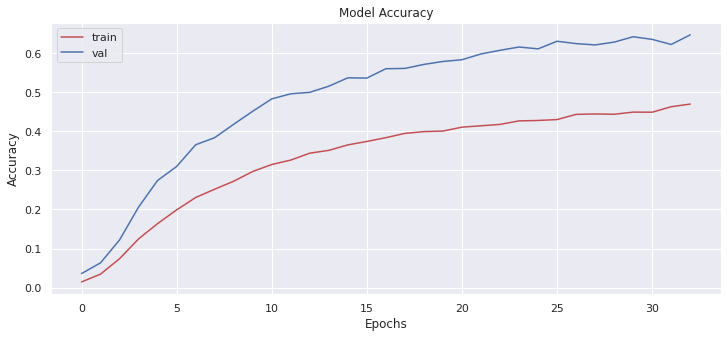

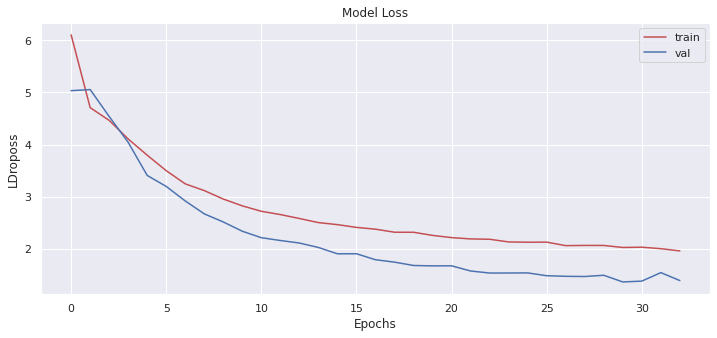

134/134 - 20s - loss: 1.9144 - accuracy: 0.6021 - 20s/epoch - 148ms/step

Test accuracy: 0.6021454930305481

Test Loss: 1.9144484996795654


In [115]:
model_transfert_learning_4 = build_model_from_transfert_learning()
fit_test_plot_model('model_transfert_learning_4', model_transfert_learning_4, NB_EPOCH,train_generator_VGG16_1,validation_generator_VGG16_1,test_generator_VGG16_1)

# Ré-utilisation d'un modèle pré-entraîné MobileNet (Transfer Learning):

Instanciation du model pré-entraîné

In [ ]:
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model

Création du model avec les dernières couches de classifications à entraîner

In [ ]:
def build_model_from_transfert_learning():

#paramètres:
#padding: valid/same
#size: 256/512
#dropout_regularization: True/False
    
    # Charger MobileNet pré-entraîné sur ImageNet et sans les couches fully-connected
    model = MobileNet(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    
     #Je choisis de n'entraîner que le classifieur
    for layer in model.layers:
        layer.trainable = False
    
    #Flatten the output from second last fully connected layer in MobileNet
    flatten_layer = keras.layers.Flatten()(model.output)
    
    #fully connected layer with 512 hidden units and ReLu activation
    flattened_fc_layer = keras.layers.Dense(512, activation='relu')(flatten_layer)
    
    #the last fully connected sigmoid layer with 120 neurons
    flattened_fc_softmax_layer = keras.layers.Dense(120, activation='softmax')(flattened_fc_layer)
    
    # Définir le nouveau modèle
    new_model = Model(inputs=model.input, outputs=flattened_fc_softmax_layer)
    
    return new_model

In [ ]:
train_datagen_MobileNet_1 = ImageDataGenerator(
    zoom_range=0.3,
    width_shift_range=0.1,
    height_shift_range=0.1,
    channel_shift_range=0.1,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range=[0.3,1.0],
    preprocessing_function=preprocess_input
)

validation_datagen_MobileNet_1 = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.5,
)

In [ ]:
train_datagen_MobileNet_1.fit(X_fitting)
validation_datagen_MobileNet_1.fit(X_fitting)

In [42]:
train_generator_MobileNet_1 = train_datagen_MobileNet_1.flow_from_dataframe(
    dataframe = TrainList_df_2,
    directory = IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode ='categorical',
    shuffle = True,
    verbale=2
)

validation_generator_MobileNet_1 = validation_datagen_MobileNet_1.flow_from_dataframe(
    dataframe = TrainList_df_2,
    directory = IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation',
    seed=1
)

test_generator_MobileNet_1 = validation_datagen_MobileNet_1.flow_from_dataframe(
    dataframe=TestList_df_2,
    directory=IMAGE_FOLDER_PATH,
     x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training',
    seed=1
)

Found 11994 validated image filenames belonging to 120 classes.
Found 5997 validated image filenames belonging to 120 classes.
Found 4288 validated image filenames belonging to 120 classes.


Epoch 1/100

Epoch 1: val_loss improved from inf to 2.65561, saving model to save_dogs_deep_learning_model_transfert_learning_5.h5
374/374 - 232s - loss: 4.1506 - accuracy: 0.1066 - val_loss: 2.6556 - val_accuracy: 0.3229 - lr: 1.0000e-04 - 232s/epoch - 621ms/step
Epoch 2/100

Epoch 2: val_loss improved from 2.65561 to 1.81753, saving model to save_dogs_deep_learning_model_transfert_learning_5.h5
374/374 - 220s - loss: 2.9214 - accuracy: 0.2773 - val_loss: 1.8175 - val_accuracy: 0.4856 - lr: 1.0000e-04 - 220s/epoch - 588ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.81753 to 1.37534, saving model to save_dogs_deep_learning_model_transfert_learning_5.h5
374/374 - 221s - loss: 2.4886 - accuracy: 0.3624 - val_loss: 1.3753 - val_accuracy: 0.6019 - lr: 1.0000e-04 - 221s/epoch - 590ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.37534 to 1.24354, saving model to save_dogs_deep_learning_model_transfert_learning_5.h5
374/374 - 220s - loss: 2.2906 - accuracy: 0.4065 - val_loss: 1

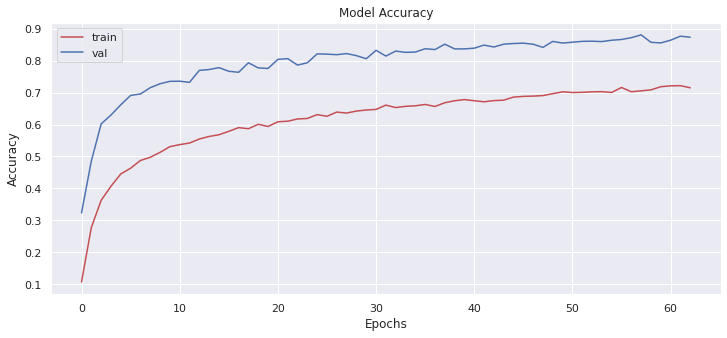

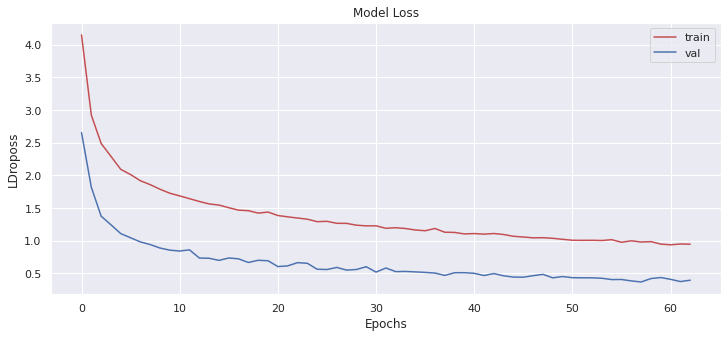

134/134 - 17s - loss: 1.2542 - accuracy: 0.6758 - 17s/epoch - 127ms/step

Test accuracy: 0.6758395433425903

Test Loss: 1.254164457321167


In [45]:
model_transfert_learning_5 = build_model_from_transfert_learning()
fit_test_plot_model('model_transfert_learning_5', model_transfert_learning_5, NB_EPOCH,train_generator_MobileNet_1,validation_generator_MobileNet_1,test_generator_MobileNet_1)

# Ré-utilisation d'un modèle pré-entraîné RestNet (Transfer Learning):

Instanciation du model pré-entraîné

In [35]:
from keras.applications.resnet import ResNet50, preprocess_input
from keras.models import Model

Création du model avec les dernières couches de classifications à entraîner

In [36]:
def build_model_from_transfert_learning_ResNet50():

#paramètres:
#padding: valid/same
#size: 256/512
#dropout_regularization: True/False
    
    # Charger MobileNet pré-entraîné sur ImageNet et sans les couches fully-connected
    model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    
     #Je choisis de n'entraîner que le classifieur
    for layer in model.layers:
        layer.trainable = False
    
    #Flatten the output from second last fully connected layer in MobileNet
    flatten_layer = keras.layers.Flatten()(model.output)
    
    #fully connected layer with 512 hidden units and ReLu activation
    flattened_fc_layer = keras.layers.Dense(512, activation='relu')(flatten_layer)
    
    #the last fully connected sigmoid layer with 120 neurons
    flattened_fc_softmax_layer = keras.layers.Dense(120, activation='softmax')(flattened_fc_layer)
    
    # Définir le nouveau modèle
    new_model = Model(inputs=model.input, outputs=flattened_fc_softmax_layer)
    
    return new_model

In [37]:
train_datagen_ResNet50_1 = ImageDataGenerator(
    zoom_range=0.3,
    width_shift_range=0.1,
    height_shift_range=0.1,
    channel_shift_range=0.1,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range=[0.3,1.0],
    preprocessing_function=preprocess_input
)

validation_datagen_ResNet50_1 = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.5,
)

In [42]:
#Début chronomètre
start = time.time()

train_datagen_ResNet50_1.fit(X_fitting)
validation_datagen_ResNet50_1.fit(X_fitting)

end = time.time()
print('Temps écoulé : '+str(end-start))

Temps écoulé : 13.714104890823364


In [43]:
train_generator_ResNet_1 = train_datagen_ResNet50_1.flow_from_dataframe(
    dataframe = TrainList_df_2,
    directory = IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode ='categorical',
    shuffle = True,
    verbale=2
)

validation_generator_ResNet_1 = validation_datagen_ResNet50_1.flow_from_dataframe(
    dataframe = TrainList_df_2,
    directory = IMAGE_FOLDER_PATH,
    x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation',
    seed=1
)

test_generator_ResNet_1 = validation_datagen_ResNet50_1.flow_from_dataframe(
    dataframe=TestList_df_2,
    directory=IMAGE_FOLDER_PATH,
     x_col = 'NomImage',
    y_col = 'ClasseImageLibelle',
    target_size = (IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size = 32,
    color_mode =COLOR_MODE,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training',
    seed=1
)

Found 11994 validated image filenames belonging to 120 classes.
Found 5997 validated image filenames belonging to 120 classes.
Found 4288 validated image filenames belonging to 120 classes.


Entraînement du model ResNet:

Epoch 1/100

Epoch 1: val_loss improved from inf to 2.50378, saving model to save_dogs_deep_learning_model_transfert_learning_6.h5
374/374 - 226s - loss: 4.1276 - accuracy: 0.1216 - val_loss: 2.5038 - val_accuracy: 0.3718 - lr: 1.0000e-04 - 226s/epoch - 604ms/step
Epoch 2/100

Epoch 2: val_loss improved from 2.50378 to 1.71160, saving model to save_dogs_deep_learning_model_transfert_learning_6.h5
374/374 - 227s - loss: 2.9984 - accuracy: 0.2852 - val_loss: 1.7116 - val_accuracy: 0.5413 - lr: 1.0000e-04 - 227s/epoch - 607ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.71160 to 1.39768, saving model to save_dogs_deep_learning_model_transfert_learning_6.h5
374/374 - 217s - loss: 2.6215 - accuracy: 0.3519 - val_loss: 1.3977 - val_accuracy: 0.6071 - lr: 1.0000e-04 - 217s/epoch - 580ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.39768 to 1.32031, saving model to save_dogs_deep_learning_model_transfert_learning_6.h5
374/374 - 215s - loss: 2.4090 - accuracy: 0.3938 - val_loss: 1

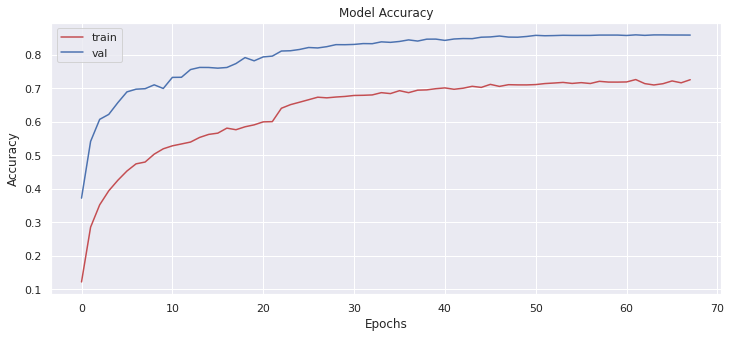

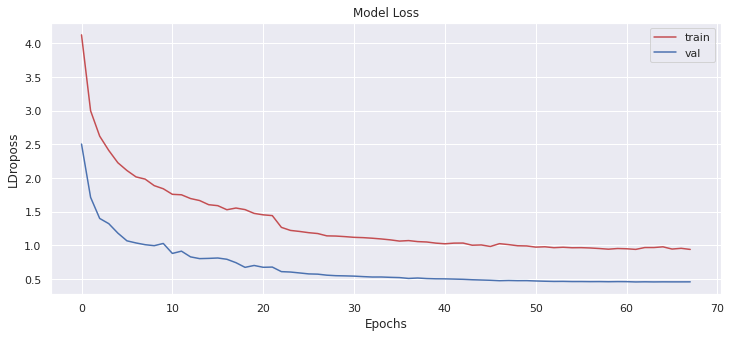

134/134 - 18s - loss: 1.0461 - accuracy: 0.7092 - 18s/epoch - 132ms/step

Test accuracy: 0.7091884613037109

Test Loss: 1.0460810661315918


In [44]:
model_transfert_learning_6 = build_model_from_transfert_learning_ResNet50()
fit_test_plot_model('model_transfert_learning_6', model_transfert_learning_6, NB_EPOCH,train_generator_ResNet_1,validation_generator_ResNet_1,test_generator_ResNet_1)

Je sauvegarde le modèle entraîné:

In [45]:
model_transfert_learning_6.save("drive/MyDrive/Colab Notebooks/dog_classifier.h5", include_optimizer=True)

Je serialise le tableau des labels des différentes classes pour décoder les prédictions ensuite:

In [50]:
label_map = (train_generator_ResNet_1.class_indices)

In [53]:
import pickle
f=open('drive/MyDrive/Colab Notebooks/label_map.txt','wb')  #opened the file in write and binary mode 
pickle.dump(label_map,f) #dumping the content in the variable 'content' into the file
f.close() #closing the file